In [68]:
from sklearn import svm
import matplotlib.pyplot as plt
import lib

In [122]:
X,y = lib.generate_triangle(samples=1500)

In [129]:
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

In [144]:
coef = clf.coef_
coef[0,0]*7.6

-1.9301849474855108

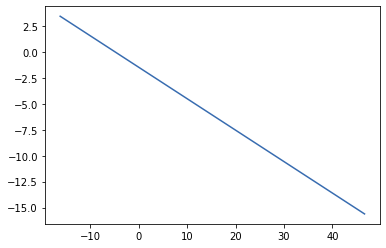

In [131]:
fig, sub = plt.subplots(1,1)
plt.subplots_adjust(wspace=0.5, hspace=0.5)

ax= sub

X0, X1 = X[:, 0], X[:, 1]
xx, yy = lib.make_meshgrid(X0, X1)

line = np.linspace(X[:, 1].min() - 5, X[:, 1].max() + 5)
coef = clf.coef_
intecept = clf.intercept_
line2 = -(line * coef[0,1] + intercept) / coef[0,0]
ax.plot(line2, line, "-", c=colors[col[0]])

plt.show()

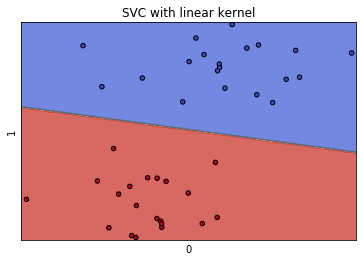

In [143]:
C = 1.0  # SVM regularization parameter
# models = (svm.SVC(kernel='linear', C=C),
#           svm.LinearSVC(C=C, max_iter=10000),
#           svm.SVC(kernel='rbf', gamma=0.7, C=C),
#           svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
# models = (clf.fit(X, y) for clf in models)

# title for the plots
title = 'SVC with linear kernel'

# # Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(1,1)
plt.subplots_adjust(wspace=0.5, hspace=0.5)

ax= sub

X0, X1 = X[:, 0], X[:, 1]
xx, yy = lib.make_meshgrid(X0, X1)

# ###########################################################################
line = np.linspace(X[:, 0].min()-50, X[:, 0].max()+50)
coef = clf.coef_
intecept = clf.intercept_
line2 = -(line * coef[0,1] + intercept) / coef[0,0]-7.6
ax.plot(line2, line, "-", c=colors[col[1]])
# ###########################################################################

# for clf, title, ax in zip(models, titles, sub.flatten()):
lib.plot_contours(ax, clf, xx, yy,
              cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('0')
ax.set_ylabel('1')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)

plt.show()

In [133]:
line2 = -(line * coef[1])# + intercept) / coef[0]

IndexError: index 1 is out of bounds for axis 0 with size 1

In [33]:
coef

array([[-0.84273624, -0.43057739],
       [ 0.140923  , -1.2326873 ],
       [ 0.96042382, -0.05907292]])

Automatically created module for IPython interactive environment


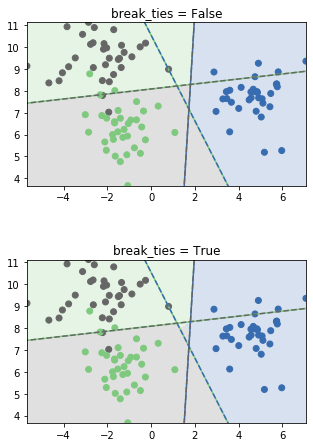

In [27]:
print(__doc__)


# Code source: Andreas Mueller, Adrin Jalali
# License: BSD 3 clause


import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=27)

fig, sub = plt.subplots(2, 1, figsize=(5, 8))
titles = ("break_ties = False",
          "break_ties = True")

for break_ties, title, ax in zip((False, True), titles, sub.flatten()):

    svm = SVC(kernel="linear", C=1, break_ties=break_ties,
              decision_function_shape='ovr').fit(X, y)

    xlim = [X[:, 0].min(), X[:, 0].max()]
    ylim = [X[:, 1].min(), X[:, 1].max()]

    xs = np.linspace(xlim[0], xlim[1], 1000)
    ys = np.linspace(ylim[0], ylim[1], 1000)
    xx, yy = np.meshgrid(xs, ys)

    pred = svm.predict(np.c_[xx.ravel(), yy.ravel()])

    colors = [plt.cm.Accent(i) for i in [0, 4, 7]]

    points = ax.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent")
    classes = [(0, 1), (0, 2), (1, 2)]
    line = np.linspace(X[:, 1].min() - 5, X[:, 1].max() + 5)
    ax.imshow(-pred.reshape(xx.shape), cmap="Accent", alpha=.2,
              extent=(xlim[0], xlim[1], ylim[1], ylim[0]))

    for coef, intercept, col in zip(svm.coef_, svm.intercept_, classes):
        line2 = -(line * coef[1] + intercept) / coef[0]
        ax.plot(line2, line, "-", c=colors[col[0]])
        ax.plot(line2, line, "--", c=colors[col[1]])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_title(title)
    ax.set_aspect("equal")

plt.show()


In [19]:
b

Automatically created module for IPython interactive environment


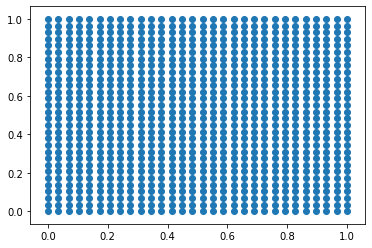

In [128]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

# plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
# ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
#            linestyles=['--', '-', '--'])
ax.scatter(xy[:,0],xy[:,1])
# plot support vectors
# ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
#            linewidth=1, facecolors='none', edgecolors='k')
plt.show()


In [97]:
np.shape(xy)

(900, 2)

In [101]:
xy

array([[0.        , 0.        ],
       [0.        , 0.03448276],
       [0.        , 0.06896552],
       ...,
       [1.        , 0.93103448],
       [1.        , 0.96551724],
       [1.        , 1.        ]])